## **Electric Vehicle Population EDA**

**Objectives** :  Analyze the Electric Vehicle (EV) dataset to uncover patterns, trends, and insights into EV sales and market. \
**Dataset** : Data collected from [data.gov](https://catalog.data.gov/dataset/electric-vehicle-population-data)
For more information about the dataset, referse to the [README file](../data/README.md).

#### **Import Neccessory modules**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from camel_converter import to_snake

from dotenv import load_dotenv
load_dotenv()

import os
PROJECT_DIR = os.getenv("PROJECT_DIR")

# data cleaning helper scirpt 
import sys
sys.path.append(f"{PROJECT_DIR}/eda-and-visualization/EV-vechicle/scripts")
import visualizing as vis_helper

#### **Getting Start**

##### read dataset

In [2]:
df = pd.read_csv(f"{PROJECT_DIR}/eda-and-visualization/EV-vechicle/data/ev_population.csv")

##### dataset lookup

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205439 entries, 0 to 205438
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         205439 non-null  object 
 1   County                                             205436 non-null  object 
 2   City                                               205436 non-null  object 
 3   State                                              205439 non-null  object 
 4   Postal Code                                        205436 non-null  float64
 5   Model Year                                         205439 non-null  int64  
 6   Make                                               205439 non-null  object 
 7   Model                                              205438 non-null  object 
 8   Electric Vehicle Type                              205439 non-null  object

In [4]:
print(f"Dataframe contain {df.shape[0]} rows & {df.shape[1]} columns")

Dataframe contain 205439 rows & 17 columns


In [5]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,35.0,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0,0.0,35.0,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJ3E1EA4L,King,Seattle,WA,98101.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266.0,0.0,43.0,113120017,POINT (-122.3340795 47.6099315),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP8E,King,Seattle,WA,98125.0,2014,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,46.0,108188713,POINT (-122.304356 47.715668),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
4,1G1FX6S00H,Thurston,Yelm,WA,98597.0,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,20.0,176448940,POINT (-122.5715761 46.9095798),PUGET SOUND ENERGY INC,5.306701e+10


#### **Data cleaning**

##### Drop unwanted columns

In [6]:
df.sample()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
148641,7SAYGAEE1P,King,Kirkland,WA,98034.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,244515365,POINT (-122.2026532 47.7210518),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


In [7]:
unwanted_cols = ["VIN (1-10)", "DOL Vehicle ID", "2020 Census Tract", "Legislative District", "Postal Code", \
                 "Vehicle Location"]
# new df without unwanted columns
df = df.drop(columns=unwanted_cols, axis=1)

In [8]:
df.sample()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Electric Utility
101215,Snohomish,Mukilteo,WA,2013,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,PUGET SOUND ENERGY INC


##### Drop duplicated rows

In [9]:
duplicate_df = df.duplicated()
print(f"The dataframe contain {df[duplicate_df].shape[0]} duplicated rows")
# even though when we remove this much no.of rows it will strongly reduce our dataset but...

df = df[~duplicate_df]

The dataframe contain 167254 duplicated rows


In [10]:
df.shape

(38185, 11)

##### Rename column names

In [11]:
map_cols = {
    "Electric Vehicle Type" : "type",
    "Clean Alternative Fuel Vehicle (CAFV) Eligibility" : "cafv eligibility"}

# replace large column names with meaningfull names
df = df.rename(columns=map_cols)

In [12]:
# change all column name into snake_case format
df.columns = [to_snake("_".join(each.lower().split(" "))) for each in df.columns]

In [13]:
df.sample()

,county,city,state,model_year,make,model,type,cafv_eligibility,electric_range,base_msrp,electric_utility
2553,Yakima,Selah,WA,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25.0,0.0,PACIFICORP


##### Handle invalid data points

In [14]:
for each in df.columns:
    print(each)
    print(df[each].unique())
    print("*" * 100)

county
['Kitsap' 'King' 'Thurston' 'Snohomish' 'Yakima' 'Island' 'Skagit'
 'Spokane' 'Clallam' 'Chelan' 'Walla Walla' 'Kittitas' 'Whitman' 'Stevens'
 'Grant' 'Douglas' 'Clark' 'Cowlitz' 'Jefferson' 'Klickitat' 'Pierce'
 'Franklin' 'Whatcom' 'San Juan' 'Columbia' 'Grays Harbor' 'Lewis'
 'Benton' 'Pacific' 'Mason' 'Platte' 'Monterey' 'Wahkiakum' 'Norfolk'
 'Okanogan' 'Cumberland' 'Skamania' "Prince George's" 'Garfield'
 'Pend Oreille' 'Asotin' 'Lincoln' 'Adams' 'San Diego' 'Oldham' 'York'
 'Orange' 'Wake' 'Los Angeles' 'Sonoma' 'Ferry' 'Churchill' 'DeKalb'
 'Goochland' 'Stafford' 'Contra Costa' 'Riverside' 'Loudoun' 'Allen'
 'James City' 'Anne Arundel' 'Madison' 'Isle of Wight' 'Leavenworth'
 'Charles' 'Sarpy' 'Kings' 'Ventura' 'San Mateo' 'Sacramento' 'Maui' nan
 'Ada' 'Mobile' 'District of Columbia' 'New York' 'Multnomah' 'Fairfax'
 'Wichita' 'El Paso' 'Honolulu' 'Maricopa' 'Montgomery' 'Hillsborough'
 'Doña Ana' 'Autauga' 'Berkeley' 'Escambia' 'Polk' 'Charleston' 'Hamilton'
 'Mercer' 

In [15]:
df['base_msrp'] = df['base_msrp'].replace({0 : np.nan})
df['electric_range'] = df['electric_range'].replace({0 : np.nan})

In [16]:
cafv_map = {
    "Eligibility unknown as battery range has not been researched" : "Unknown",
    "Clean Alternative Fuel Vehicle Eligible" : "Eligible",
    "Not eligible due to low battery range" : "Not Eligible"
}

df['cafv_eligibility'] = df['cafv_eligibility'].replace(cafv_map)
df['cafv_eligibility'].value_counts()

cafv_eligibility
Eligible        15640
Unknown         14659
Not Eligible     7886
Name: count, dtype: int64

In [17]:
type_map = {
    "Battery Electric Vehicle (BEV)" : "BEV",
    "Plug-in Hybrid Electric Vehicle (PHEV)" : "PHEV"
}
df['type'] = df['type'].replace(type_map)
df['type'].value_counts()

type
BEV     23630
PHEV    14555
Name: count, dtype: int64

In [18]:
df.head()

,county,city,state,model_year,make,model,type,cafv_eligibility,electric_range,base_msrp,electric_utility
0,Kitsap,Seabeck,WA,2023,TOYOTA,RAV4 PRIME,PHEV,Eligible,42.0,NaN,PUGET SOUND ENERGY INC
1,Kitsap,Bremerton,WA,2018,NISSAN,LEAF,BEV,Eligible,151.0,NaN,PUGET SOUND ENERGY INC
2,King,Seattle,WA,2020,TESLA,MODEL 3,BEV,Eligible,266.0,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
3,King,Seattle,WA,2014,NISSAN,LEAF,BEV,Eligible,84.0,NaN,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)
4,Thurston,Yelm,WA,2017,CHEVROLET,BOLT EV,BEV,Eligible,238.0,NaN,PUGET SOUND ENERGY INC


##### Handle Null values

In [19]:
df.isna().mean() * 100     # columns percentage of missing values

county               0.007856
city                 0.007856
state                0.000000
model_year           0.000000
make                 0.000000
model                0.002619
type                 0.000000
cafv_eligibility     0.000000
electric_range      38.405133
base_msrp           96.579809
electric_utility     0.007856
dtype: float64

In [20]:
df = df.drop(columns=["base_msrp", "electric_range"])    
# drop columns which have large null values,
# we lost 2 important varibales, we dont have another option here
# when we try to impute the null values it change the data

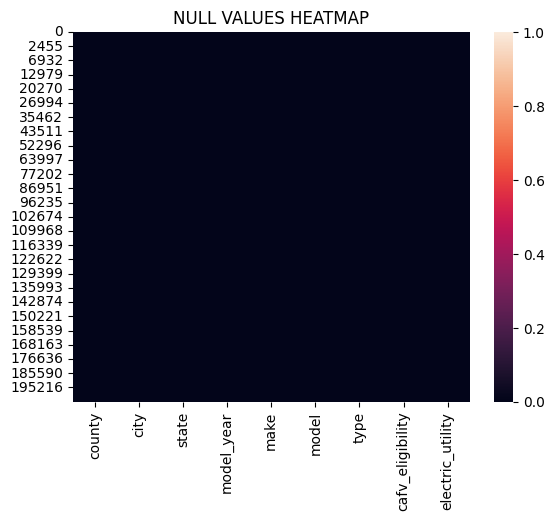

In [21]:
plt.title("NULL VALUES HEATMAP")
sns.heatmap(data=df.isna())
plt.show()

- there is very small size of missing values, so we can drop it

In [22]:
df = df.dropna(how="any", axis=0)    # it remove entire rows when it contain any of NaN values

In [23]:
df.isna().sum()

county              0
city                0
state               0
model_year          0
make                0
model               0
type                0
cafv_eligibility    0
electric_utility    0
dtype: int64

In [24]:
df.shape

(38181, 9)

##### Confirm Data-Type

In [25]:
df.dtypes

county              object
city                object
state               object
model_year           int64
make                object
model               object
type                object
cafv_eligibility    object
electric_utility    object
dtype: object

##### Save Cleaned dataset

In [26]:
df.to_csv(f"{PROJECT_DIR}/data/cleaned/ev_data.csv", index=False)

#### **Alias**

**cafv** &nbsp; &nbsp; &nbsp;=&nbsp; Clean Alternative Fuel Vehicle \
**PHEV** &nbsp; &nbsp;=&nbsp; Plug-In Hybrid Elevtric Vehicle \
**BEV** &nbsp; &nbsp; &nbsp; =&nbsp; Battery Elecrtic Vehicle

#### **Exploratory Data Analysis**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38181 entries, 0 to 205436
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   county            38181 non-null  object
 1   city              38181 non-null  object
 2   state             38181 non-null  object
 3   model_year        38181 non-null  int64 
 4   make              38181 non-null  object
 5   model             38181 non-null  object
 6   type              38181 non-null  object
 7   cafv_eligibility  38181 non-null  object
 8   electric_utility  38181 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.9+ MB


In [28]:
df.shape

(38181, 9)

In [29]:
df.describe()

,model_year
count,38181.000000
mean,2020.307273
std,3.351767
min,1997.000000
25%,2018.000000
50%,2021.000000
75%,2023.000000
max,2025.000000


In [30]:
df.describe(include="O").T

,count,unique,top,freq
county,38181,205,King,9926
city,38181,770,Seattle,845
state,38181,43,WA,37751
make,38181,42,TESLA,7381
model,38181,152,MODEL 3,2333
type,38181,2,BEV,23628
cafv_eligibility,38181,3,Eligible,15638
electric_utility,38181,74,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),10395


In [31]:
numerical_columns = df.select_dtypes(include=np.number).columns
catagorical_columns = df.select_dtypes(include="object").columns

##### **Catagorical Features**

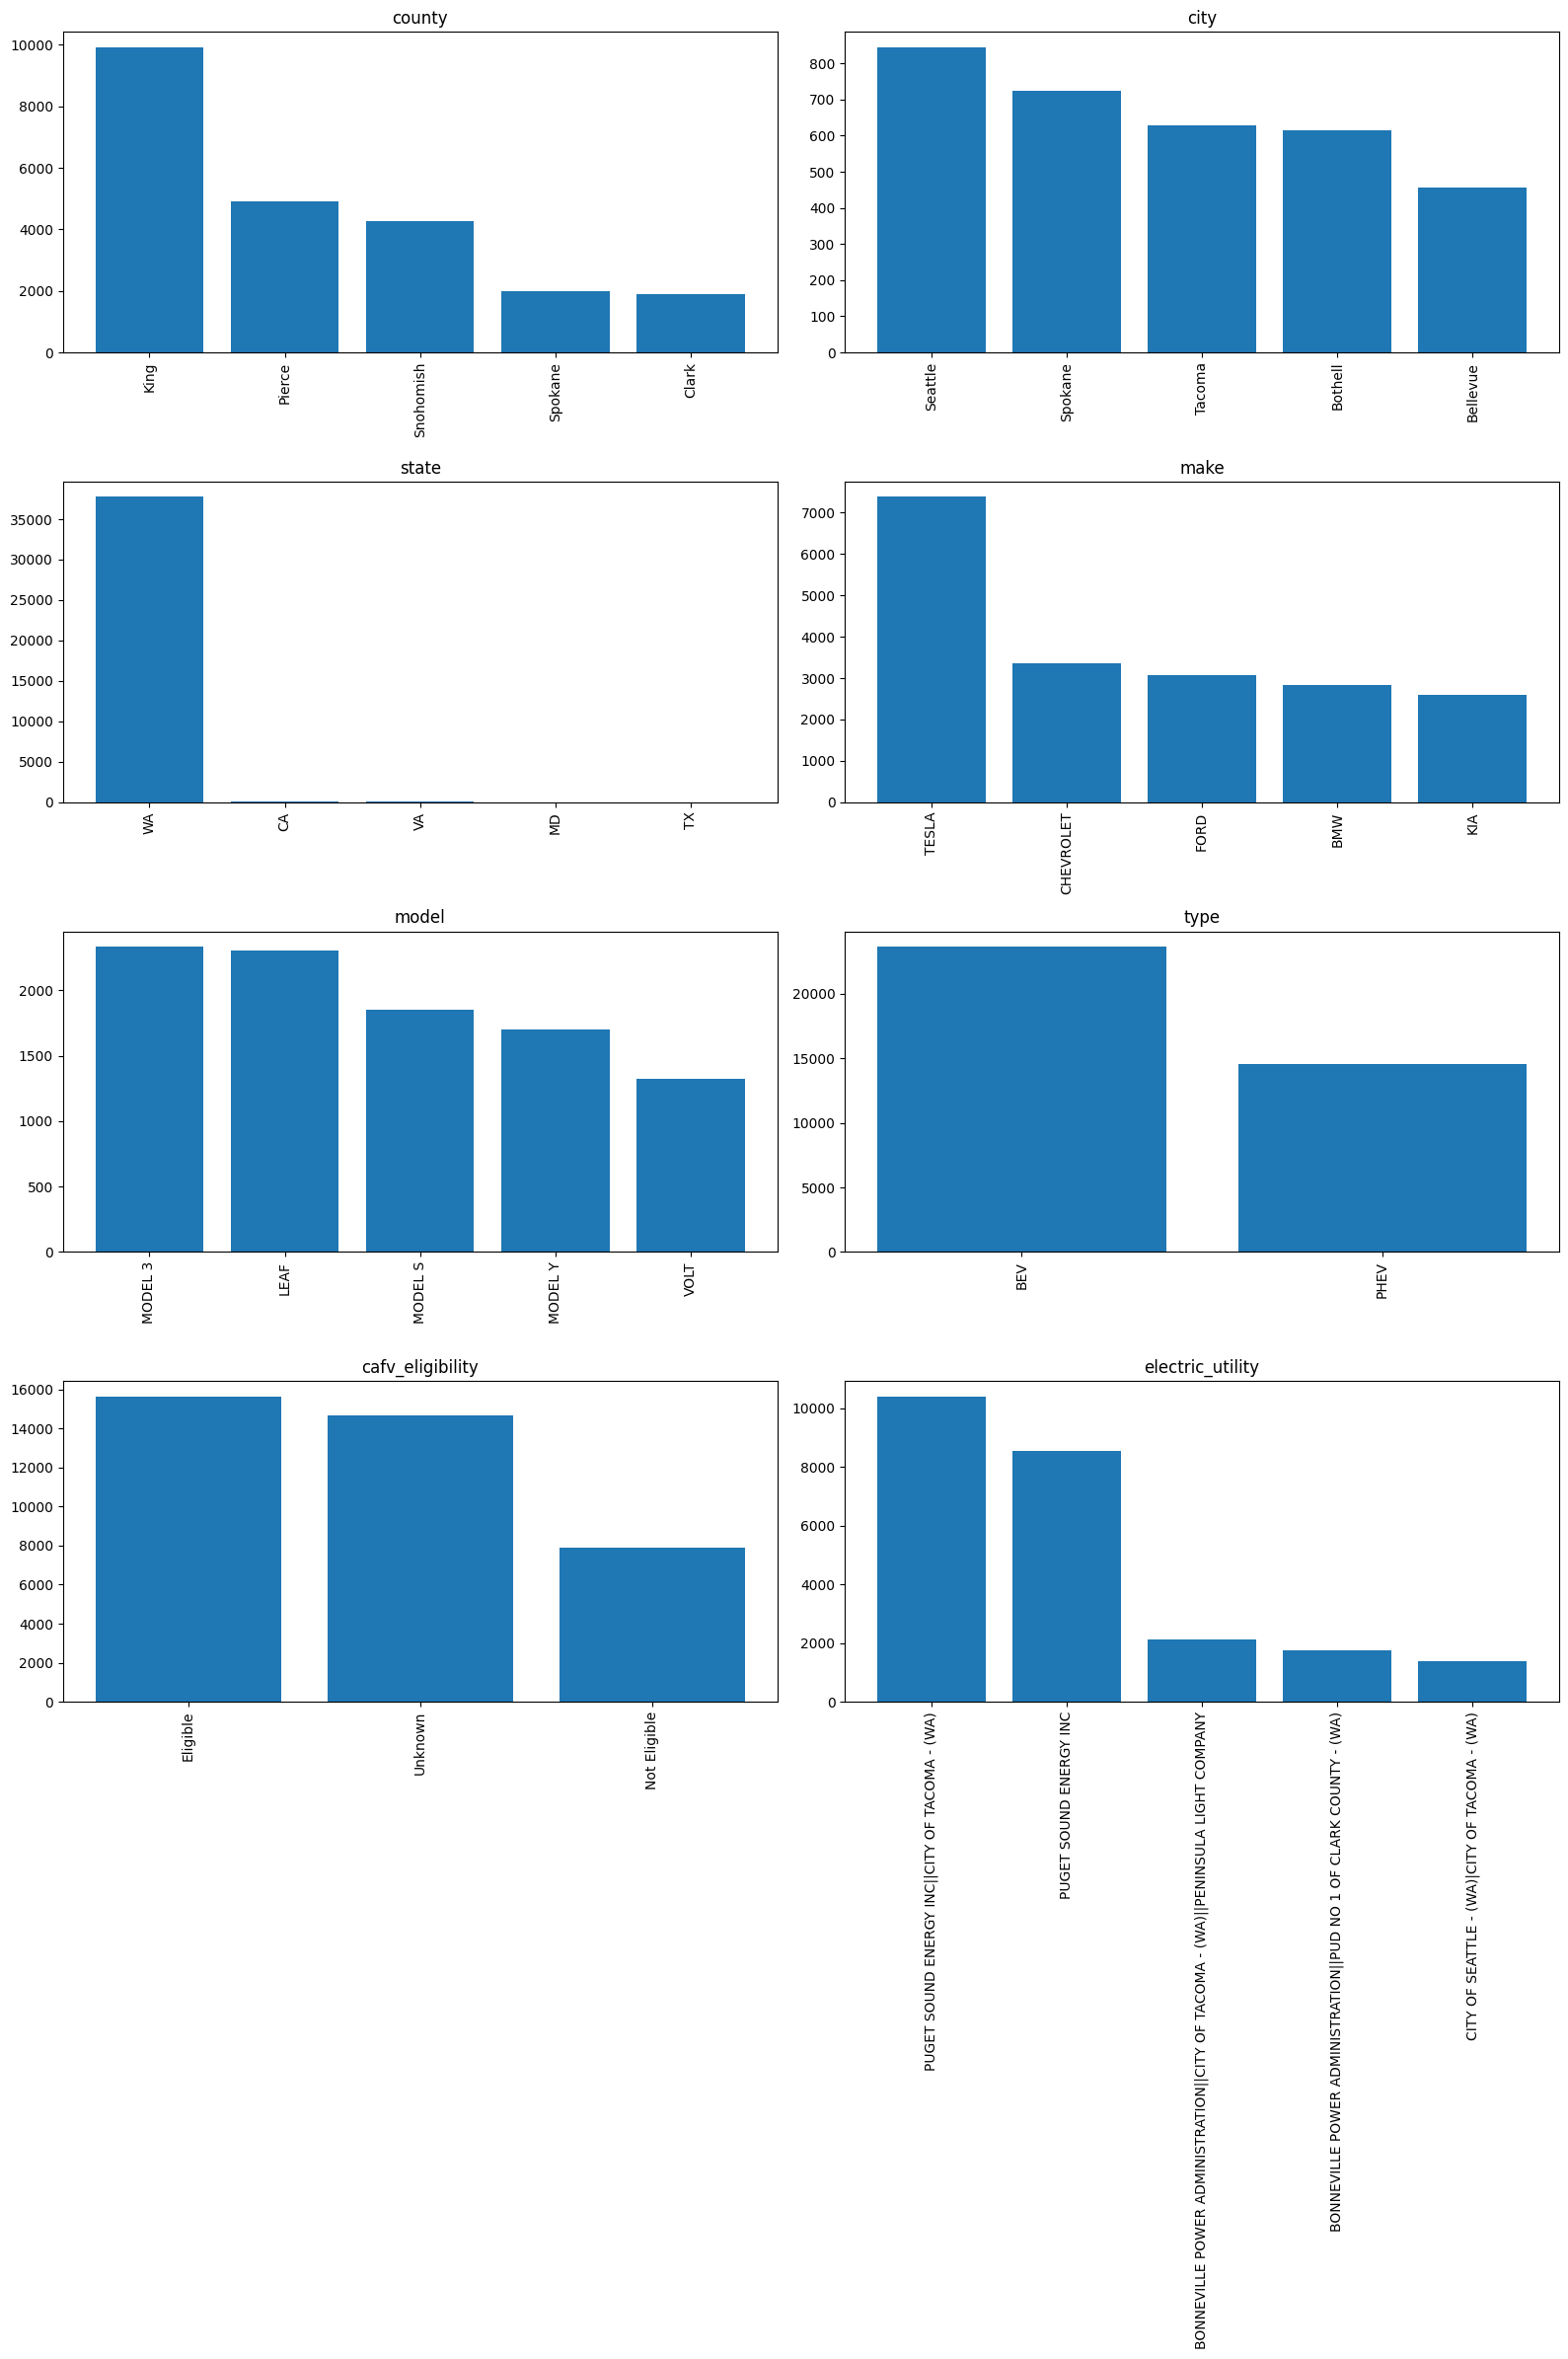

In [32]:
plt.figure(figsize=(16,24))
vis_helper.plot_catagorical(df, columns=catagorical_columns)
plt.tight_layout()
plt.show()

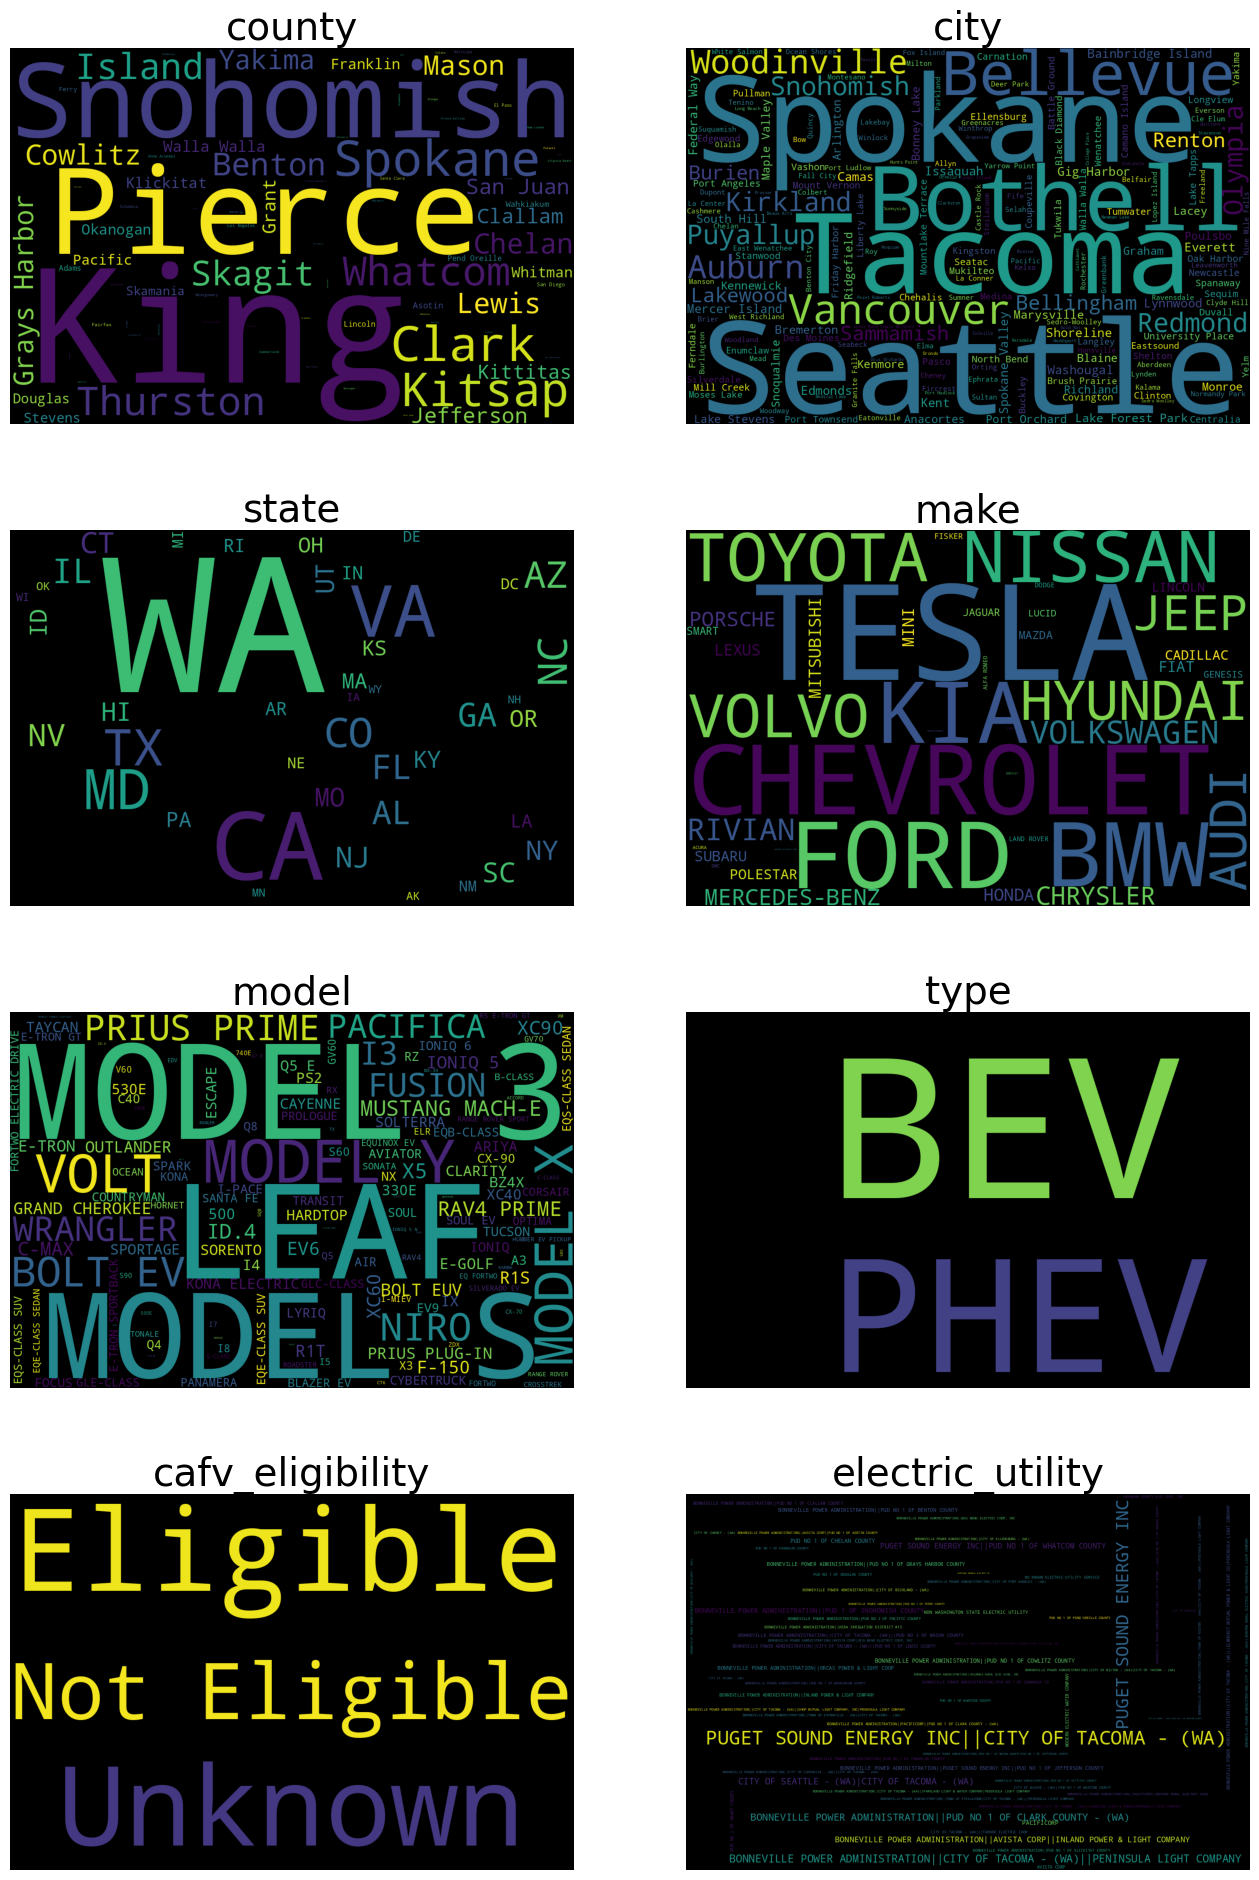

In [33]:
plt.figure(figsize=(16,24))
vis_helper.plot_wordcloud(df, columns=catagorical_columns)

##### **Numerical Feature**

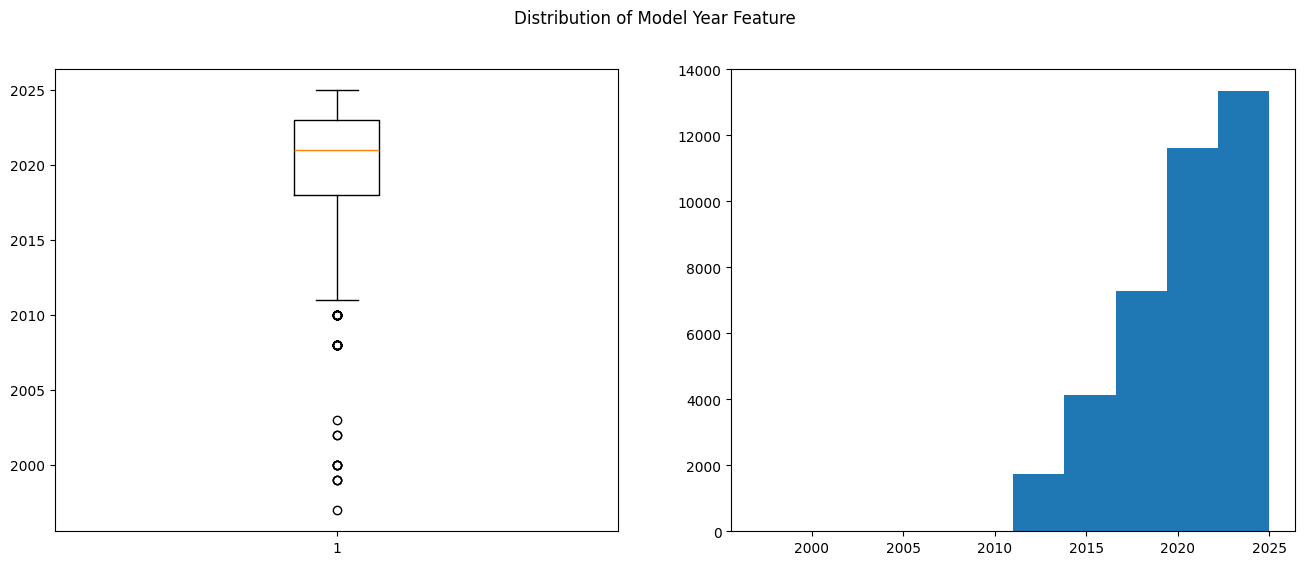

In [34]:
plt.figure(figsize=(16,6))

plt.suptitle("Distribution of Model Year Feature")
plt.subplot(1,2, 1)
plt.boxplot(df[numerical_columns])

plt.subplot(1,2,2)
plt.hist(df[numerical_columns])

plt.show()

### **Exploration**

**Key Questions to Explore:**
1. What percentage of EVs are CAFV-eligible? 
2. Is there an increase in EV adoption over recent years?
3. Which Make has the most cafv_eligibility?
4. On which year does the PHEV and BEV are made the most?

### **1. What percentage of EV are CAFV-eligible?** 

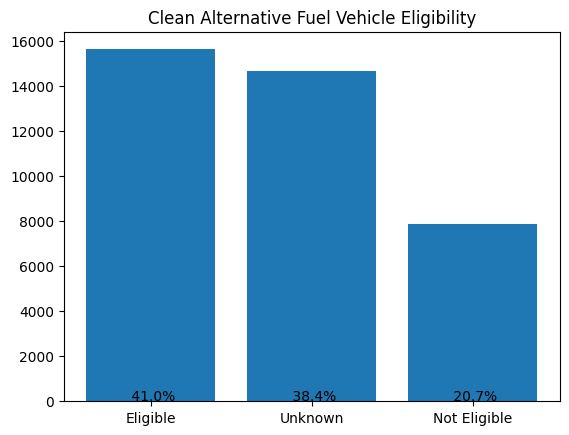

In [35]:
cafv_eligible_data = df['cafv_eligibility'].value_counts()

plt.title("Clean Alternative Fuel Vehicle Eligibility")
plt.bar(x=cafv_eligible_data.index, height=cafv_eligible_data.values)

percentage = [(each/df.shape[0])*100 for each in cafv_eligible_data.values]

for i, v in enumerate(percentage):
    plt.text(i, v + 0.5, f"{v: .1f}%", ha='center') 
plt.show()

**Clean Alternative Fuel Vehicle Eligibility have *41%* with in the Ev's**

### **2. Is there an increase in EV adoption over recent years?**

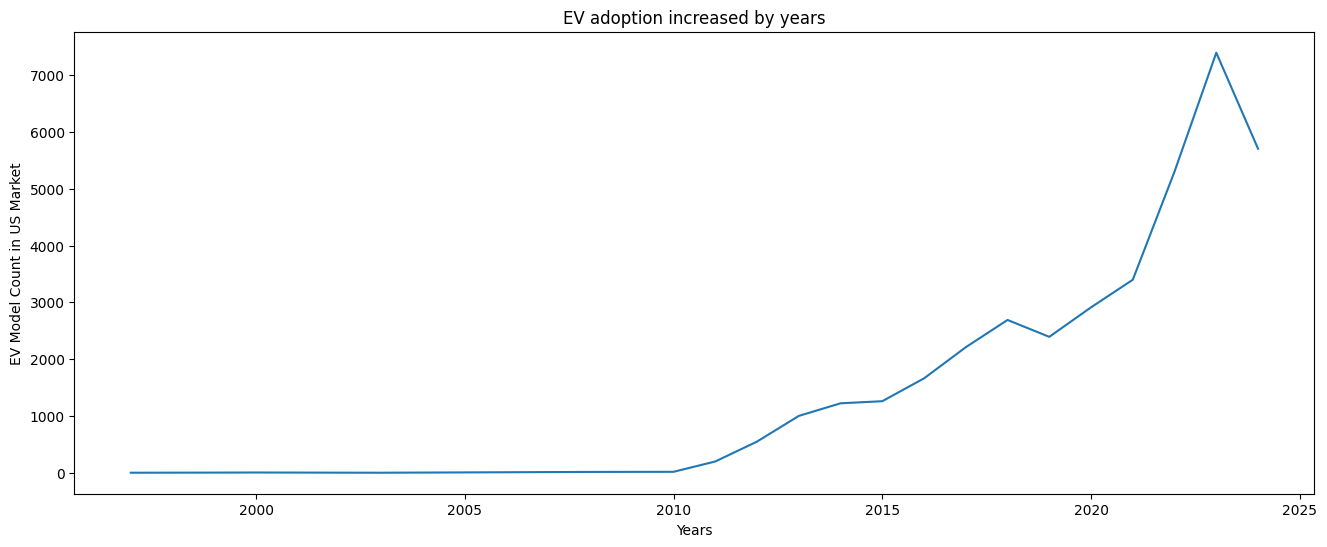

In [36]:
year_by_make_count = df.groupby('model_year')['model'].count()[:-1]   # ignore 2025

plt.figure(figsize=(16,6))
plt.title("EV adoption increased by years")
sns.lineplot(x=year_by_make_count.index, y=year_by_make_count.values)
plt.ylabel("EV Model Count in US Market")
plt.xlabel("Years")
plt.show()

**There is an increase from 2010**

### **3. Which Make has the most cafv_eligibility?**

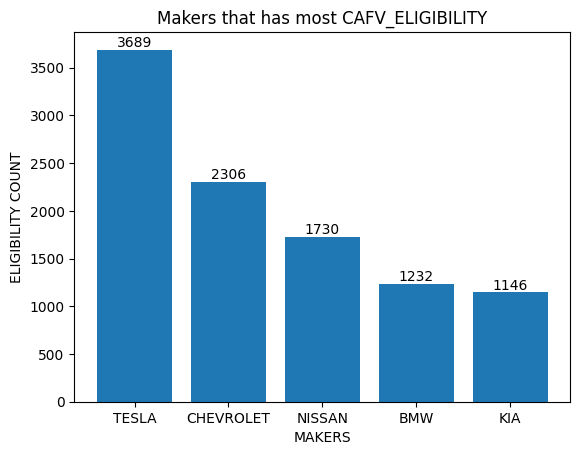

In [37]:
cafv_filter = df['cafv_eligibility'] == "Eligible"
cafv_by_make = df[cafv_filter].groupby('make')['cafv_eligibility'].count().nlargest(n=5)

plt.title("Makers that has most CAFV_ELIGIBILITY")
a = plt.bar(x=cafv_by_make.index, height=cafv_by_make.values)
plt.bar_label(a)


# percentages = [(each/df[cafv_filter].shape[0]) * 100 for each in cafv_by_make.values]
# for i, v in enumerate(percentages):
#     plt.text(i, v + 0.5, f"{v: .1f}%", ha='center')

plt.xlabel("MAKERS")
plt.ylabel("ELIGIBILITY COUNT")

plt.show()

**TESLA have the most ELIGIBILITY**

### **4. On which year does the PHEV and BEV are sold the most?**

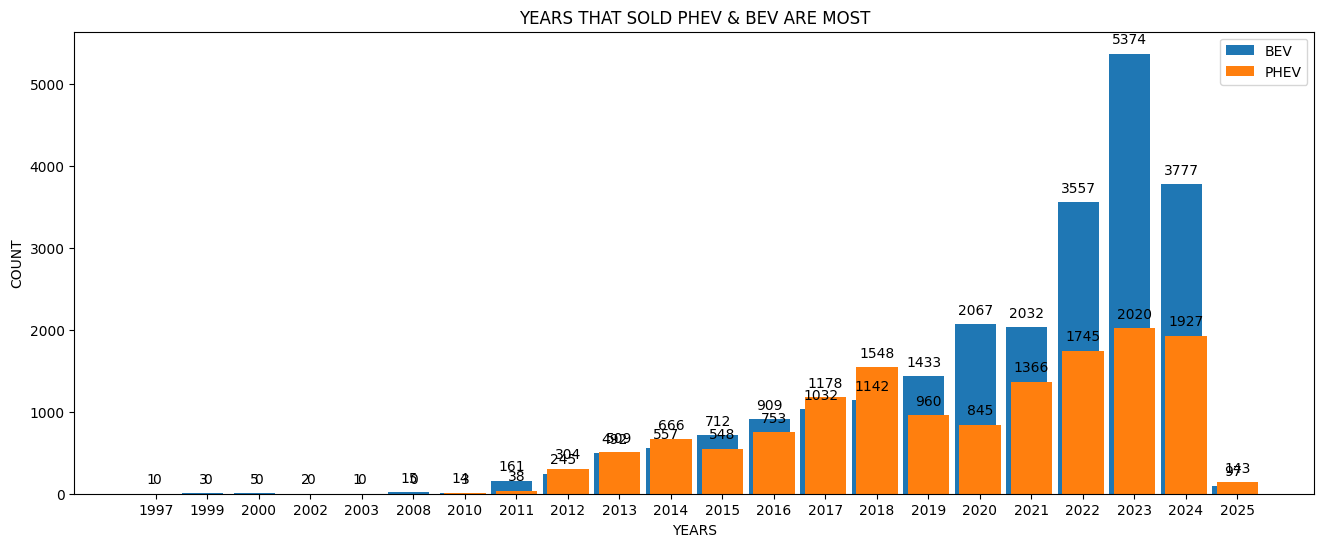

In [38]:
sam = pd.crosstab(df['model_year'], df['type'])

x = np.arange(len(sam.index))
width = .09
mul = 0
y1 = sam['BEV']
y2 = sam['PHEV']

plt.figure(figsize=(16,6))
for each in sam:
    offest = width * mul
    a = plt.bar(x+offest, sam[each], label=each)
    mul += 1
    plt.bar_label(a, padding=offest+5)

plt.title("YEARS THAT SOLD PHEV & BEV ARE MOST")
plt.xlabel("YEARS")
plt.ylabel("COUNT")
plt.legend()
plt.xticks(x+width, sam.index)
plt.show()

**2023 has the highest count**

### **5. Latest Model of each Makers**

In [39]:
latest_model_by_makes = df[df['model_year'] == 2024].groupby('make')['model'].max()

In [40]:
latest_model_by_makes

make
ACURA                          ZDX
ALFA ROMEO                  TONALE
AUDI                           SQ8
BENTLEY                   BENTAYGA
BMW                             XM
CADILLAC                     LYRIQ
CHEVROLET             SILVERADO EV
CHRYSLER                  PACIFICA
DODGE                       HORNET
FIAT                          500E
FORD                       TRANSIT
GENESIS                       GV70
GMC               HUMMER EV PICKUP
HONDA                     PROLOGUE
HYUNDAI                     TUCSON
JAGUAR                      I-PACE
JEEP                      WRANGLER
KIA                       SPORTAGE
LAND ROVER       RANGE ROVER SPORT
LEXUS                           TX
LINCOLN                    CORSAIR
LUCID                          AIR
MAZDA                        CX-90
MERCEDES-BENZ              S-CLASS
MINI                       HARDTOP
MITSUBISHI               OUTLANDER
NISSAN                        LEAF
POLESTAR                       PS2
PORSCHE        

## **Conclution**

**insights**
 1. *41% of vehicles qualify for the Clean Alternative Fuel Vehicle (CAFV) program, reflecting a growing shift toward environmentally sustainable transportation options*.
2. *EV adoption in the U.S. has steadily increased since 2010, driven by advancements in technology, environmental awareness, and government incentives.*
3. *Tesla continues to dominate the U.S. electric vehicle market, maintaining its position as the industry leader with unparalleled market share and innovation.*


 > **Next Steps**: Proceed to build a interactive Power BI Dashboard